In [29]:
import pandas as pd

In [31]:
df = pd.read_csv('synthetic_internet_to_bs_latency_dataset.csv')
df.head()

,timestamp,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms
0,2025-08-13T08:53:49.581558,video_chunk,TCP,video,Fiber,fiber,12,1942743,451.124530,10.986585,1.113226,0.417373,0.162603,13.936047,0.924105,34.451560,0.900293,56.818524
1,2025-08-13T08:53:49.581836,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber,19,109,50.638254,29.170225,4.561498,0.670438,1.773309,8.989746,0.656070,0.017220,4.739394,33.549040
2,2025-08-13T08:53:49.582091,web_small_obj,TCP,best_effort,5G,mmwave,10,3267,339.335317,18.071048,1.177563,0.267142,0.062391,7.136508,0.539916,0.077021,0.285216,18.251748
3,2025-08-13T08:53:49.582317,video_chunk,TCP,video,FixedWireless,mmwave,15,2120928,67.743237,21.469500,3.243235,0.570844,1.256795,26.069000,1.669331,250.466684,10.474843,302.657841
4,2025-08-13T08:53:49.582497,file_transfer_tcp,TCP,best_effort,5G,mmwave,15,23373627,368.820848,8.768864,0.327549,0.619678,0.169347,38.400072,2.270204,506.991448,0.945285,553.318990


In [33]:
df=df.drop("timestamp", axis=1)

In [11]:
df_encoded = pd.get_dummies(df, columns=['packet_type','protocol','qos_class','access_type','backhaul_type']).astype(int)

In [13]:
df_encoded.head()

,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,...,qos_class_voice,access_type_4G,access_type_5G,access_type_Fiber,access_type_FixedWireless,access_type_LEO_Satellite,backhaul_type_fiber,backhaul_type_microwave,backhaul_type_mixed,backhaul_type_mmwave
0,12,1942743,451,10,1,0,0,13,0,34,...,0,0,0,1,0,0,1,0,0,0
1,19,109,50,29,4,0,1,8,0,0,...,0,1,0,0,0,0,1,0,0,0
2,10,3267,339,18,1,0,0,7,0,0,...,0,0,1,0,0,0,0,0,0,1
3,15,2120928,67,21,3,0,1,26,1,250,...,0,0,0,0,1,0,0,0,0,1
4,15,23373627,368,8,0,0,0,38,2,506,...,0,0,1,0,0,0,0,0,0,1


In [15]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Show all columns
df_encoded.head() # or just df in Jupyter

,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms,final_one_way_time_ms,packet_type_control_syn_ack,packet_type_dns_query,packet_type_file_transfer_tcp,packet_type_gaming_udp,packet_type_iot_mqtt,packet_type_video_chunk,packet_type_voip_rtp,packet_type_web_large_obj,packet_type_web_small_obj,protocol_TCP,protocol_UDP,qos_class_best_effort,qos_class_ultra_reliable_low_latency,qos_class_video,qos_class_voice,access_type_4G,access_type_5G,access_type_Fiber,access_type_FixedWireless,access_type_LEO_Satellite,backhaul_type_fiber,backhaul_type_microwave,backhaul_type_mixed,backhaul_type_mmwave
0,12,1942743,451,10,1,0,0,13,0,34,0,56,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,19,109,50,29,4,0,1,8,0,0,4,33,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0
2,10,3267,339,18,1,0,0,7,0,0,0,18,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,15,2120928,67,21,3,0,1,26,1,250,10,302,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
4,15,23373627,368,8,0,0,0,38,2,506,0,553,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1


In [17]:
df_encoded.shape

(1500, 36)

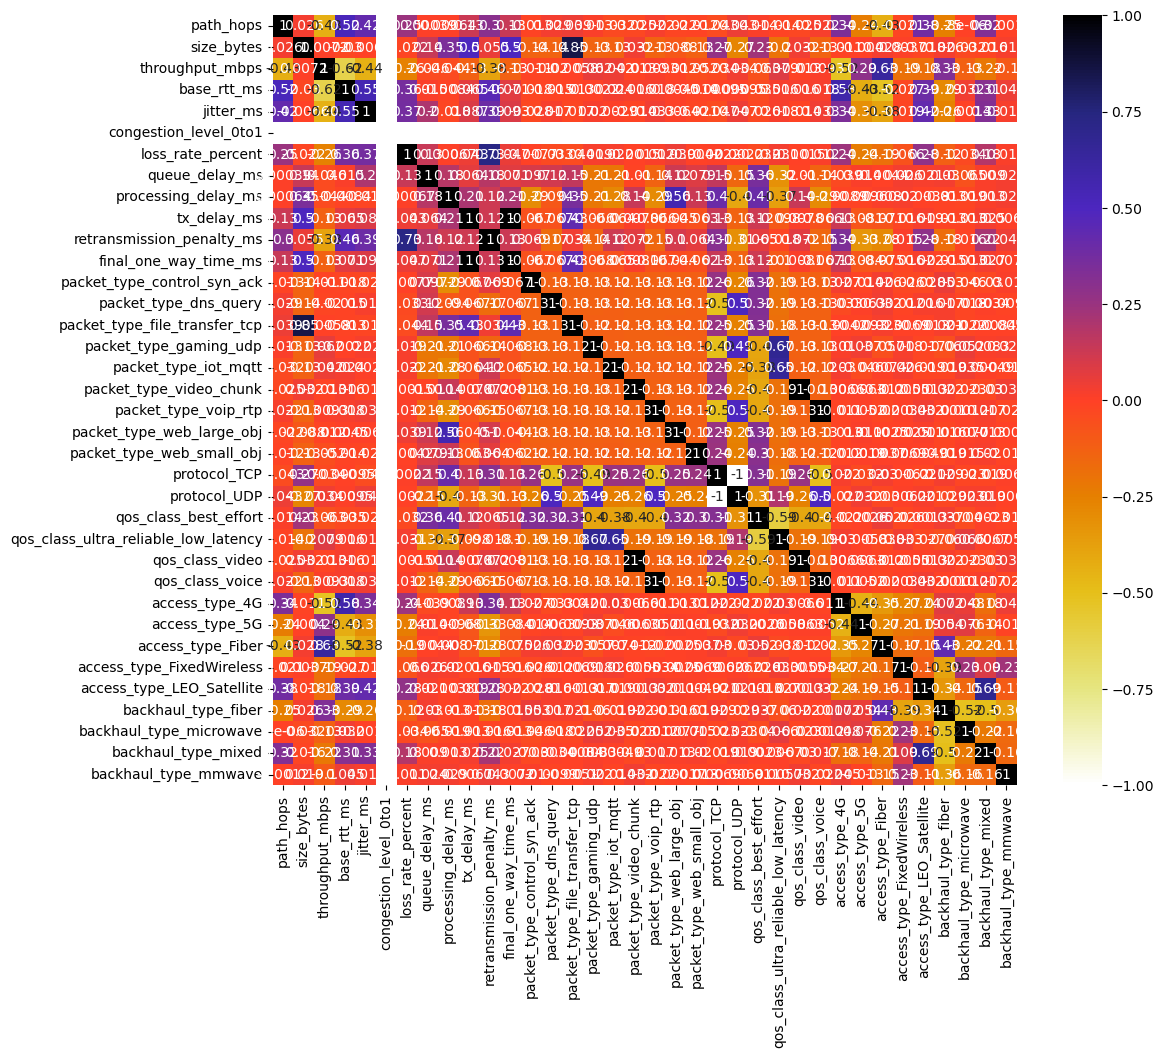

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt  # correct import

plt.figure(figsize=(12, 10))
cor = df_encoded.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
import numpy as np

In [41]:
steps=[('standard_sclar',StandardScaler()),
       ('classifier',LogisticRegression())]

In [43]:
steps

[('standard_sclar', StandardScaler()), ('classifier', LogisticRegression())]

In [45]:
Pipeline(steps)

Pipeline(steps=[('standard_sclar', StandardScaler()),
                ('classifier', LogisticRegression())])

In [47]:
# Split into features (X) and target (y)
X = df.iloc[:, :-1]   # all columns except last
y = df.iloc[:, -1]    # only last column

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
X_train.head()


,packet_type,protocol,qos_class,access_type,backhaul_type,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms
485,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber,10,131,10.636007,41.882315,3.002975,0.240347,0.966794,1.155335,1.054400,0.098533,2.431796
527,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber,15,150,71.253406,56.853176,4.511090,0.454874,0.428761,4.138200,0.462416,0.016841,0.994253
199,file_transfer_tcp,TCP,best_effort,4G,fiber,14,24910347,33.076105,26.277511,2.474070,0.172991,0.254348,2.992573,3.217080,6024.977199,1.540083
889,video_chunk,TCP,video,5G,fiber,9,584267,329.580741,15.430327,0.250461,0.222181,0.100342,3.949142,2.283309,14.182067,0.504438
844,dns_query,UDP,best_effort,4G,fiber,18,91,78.932983,33.877333,11.198692,0.829370,0.212394,68.785417,0.704088,0.009223,0.459109


In [59]:
X_train.shape

(1050, 16)

In [81]:
X_train_numeric = X_train.iloc[:,5:16]
X_train_numeric.shape

(1050, 11)

In [63]:
X_train_numeric.head()

,path_hops,size_bytes,throughput_mbps,base_rtt_ms,jitter_ms,congestion_level_0to1,loss_rate_percent,queue_delay_ms,processing_delay_ms,tx_delay_ms,retransmission_penalty_ms
485,10,131,10.636007,41.882315,3.002975,0.240347,0.966794,1.155335,1.054400,0.098533,2.431796
527,15,150,71.253406,56.853176,4.511090,0.454874,0.428761,4.138200,0.462416,0.016841,0.994253
199,14,24910347,33.076105,26.277511,2.474070,0.172991,0.254348,2.992573,3.217080,6024.977199,1.540083
889,9,584267,329.580741,15.430327,0.250461,0.222181,0.100342,3.949142,2.283309,14.182067,0.504438
844,18,91,78.932983,33.877333,11.198692,0.829370,0.212394,68.785417,0.704088,0.009223,0.459109


In [85]:
X_train_cate = X_train.iloc[:,0:5]
X_train_cate.shape

(1050, 5)

In [79]:
X_train_cate.head()

,packet_type,protocol,qos_class,access_type,backhaul_type
485,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber
527,gaming_udp,UDP,ultra_reliable_low_latency,4G,fiber
199,file_transfer_tcp,TCP,best_effort,4G,fiber
889,video_chunk,TCP,video,5G,fiber
844,dns_query,UDP,best_effort,4G,fiber


## NUMERIC PIPELINE

In [89]:
from sklearn.impute import SimpleImputer

numeric_proc = Pipeline(
    steps = [("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
             ("scaler", StandardScaler())]
)

In [91]:
numeric_proc

Pipeline(steps=[('imputation_mean', SimpleImputer()),
                ('scaler', StandardScaler())])

## CATEGORICAL

In [95]:
from sklearn.preprocessing import OneHotEncoder

categorical_proc = Pipeline(
    steps = [("imputation_constant", SimpleImputer(fill_value="missing", strategy="constant")),
             ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

In [97]:
categorical_proc

Pipeline(steps=[('imputation_constant',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## COMBINING BOTH

In [128]:
from sklearn.compose import ColumnTransformer

pre_proc = ColumnTransformer(
    [("categorical", categorical_proc,["packet_type","protocol","qos_class","access_type","backhaul_type"]),
     ("numerical", numeric_proc,["path_hops","size_bytes","throughput_mbps","base_rtt_ms","jitter_ms","congestion_level_0to1","loss_rate_percent","queue_delay_ms","processing_delay_ms","tx_delay_ms","retransmission_penalty_ms"])]
)

In [130]:
pre_proc

ColumnTransformer(transformers=[('categorical',
                                 Pipeline(steps=[('imputation_constant',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['packet_type', 'protocol', 'qos_class',
                                  'access_type', 'backhaul_type']),
                                ('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['path_hops', 'size_bytes', 'throughput_mbps',
                                  'base_rtt_ms', 'jitter_ms',
                                  'congestion_level_0to1', 'loss_rate_percent',
                                  'queue_delay_ms', 'processing_delay_ms',
                                  'tx_delay_ms',
                                  'retransmission_penalty_ms'])])

In [132]:
from sklearn.pipeline import make_pipeline

In [134]:
pipe = make_pipeline(pre_proc, LogisticRegression())

In [136]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['packet_type', 'protocol',
                                                   'qos_class', 'access_type',
                                                   'backhaul_type']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['path_hops', 'size_bytes',
                                                   'throughput_mbps',
                                                   'base_rtt_ms', 'jitter_ms',
                                                   'congestion_level_0to1',
                                                   'loss_rate_percent',
                                                   'queue_delay_ms',
                                                   'processing_delay_ms',
                                                   'tx_delay_ms',
                                                   'retransmission_penalty_ms'])])),
                ('logisticregression', LogisticRegression())])

In [142]:
# Example pipeline: replace logisticregression with rf
pipe.steps[-1] = ('regressor', RandomForestRegressor())

# Define parameter grid for RandomForestRegressor
param_distributions = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [5, 10, None]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=5,
    scoring="r2",  # For regression, use r2, neg_mean_squared_error, etc.
    cv=5,
    random_state=42
)

search.fit(X, y)

print("Best params:", search.best_params_)
print("Best score:", search.best_score_)

Best params: {'regressor__n_estimators': 200, 'regressor__max_depth': 5}
Best score: 0.9573826621303271


In [155]:
reg_pred = search.predict(X_test)

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print(mean_absolute_error(y_test,reg_pred))

20.19389728228591


## EXTRA 

In [150]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Example: split categorical & numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numeric_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols)
    ]
)

# Pipeline
pipe = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(random_state=42))
])

# Param grid
param_distributions = {
    "regressor__n_estimators": [100, 200, 300],
    "regressor__max_depth": [5, 10, None]
}

# Search
search = RandomizedSearchCV(
    pipe,
    param_distributions=param_distributions,
    n_iter=5,
    scoring="r2",
    cv=5,
    random_state=42
)

search.fit(X, y)

print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)


Best parameters: {'regressor__n_estimators': 200, 'regressor__max_depth': None}
Best score: 0.9574362030682739


In [152]:
# Get best model from RandomizedSearchCV
best_pipe = search.best_estimator_

# Get feature names from preprocessor
feature_names = best_pipe.named_steps["preprocessor"].get_feature_names_out()

# Get feature importances from RandomForest
importances = best_pipe.named_steps["regressor"].feature_importances_

# Combine into DataFrame
import pandas as pd
feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

# Sort by importance
feat_imp = feat_imp.sort_values("importance", ascending=False)

print(feat_imp)


                                      feature    importance
33                           num__tx_delay_ms  9.392105e-01
26                       num__throughput_mbps  1.989004e-02
30                     num__loss_rate_percent  8.834535e-03
34             num__retransmission_penalty_ms  7.952536e-03
24                             num__path_hops  5.874640e-03
20                   cat__backhaul_type_fiber  3.840068e-03
32                   num__processing_delay_ms  3.078008e-03
27                           num__base_rtt_ms  2.213846e-03
28                             num__jitter_ms  2.211236e-03
29                 num__congestion_level_0to1  2.111619e-03
25                            num__size_bytes  1.957226e-03
31                        num__queue_delay_ms  1.082184e-03
22                   cat__backhaul_type_mixed  7.618608e-04
21               cat__backhaul_type_microwave  4.654092e-04
23                  cat__backhaul_type_mmwave  3.415509e-04
15                        cat__access_ty